In [43]:
import pandas as pd
import networkx as nx


In [44]:
from google.colab import files


uploaded = files.upload()


Saving musae_facebook_edges.csv to musae_facebook_edges (2).csv


In [59]:
df=pd.read_csv("musae_facebook_edges.csv")

In [60]:
df.describe()

,id_1,id_2
count,171002.000000,171002.000000
mean,7880.865002,14617.111706
std,5576.987102,5508.263801
min,0.000000,14.000000
25%,3097.000000,10526.000000
50%,7062.000000,15568.000000
75%,11794.750000,19347.000000
max,22464.000000,22469.000000


In [61]:
G=nx.Graph()
G.clear()

In [62]:
df.count()

id_1    171002
id_2    171002
dtype: int64

In [63]:
for i in range(0,78):
  ob=list(df.loc[i])
  node1=int(ob[0])
  node2=int(ob[1])
  G.add_edge(node1,node2)

In [64]:
len(list(G.nodes))

83

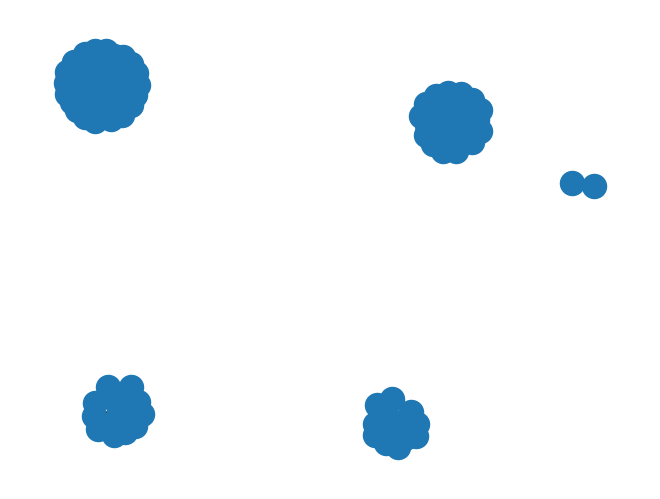

In [65]:
import matplotlib.pyplot as plt
nx.draw(G)

In [34]:
nx.degree_centrality(G)

{0: 4.450576349637278e-05,
 18427: 0.002269793938315012,
 1: 0.0015131959588766746,
 21708: 0.008678623881792693,
 22208: 0.00912368151675642,
 22171: 0.014686901953803018,
 6829: 0.001201655614402065,
 16590: 0.003872001424184432,
 20135: 0.006230806889492189,
 8894: 0.0023142997018113847,
 15785: 0.006542347233966799,
 10281: 0.0005785749254528462,
 22265: 0.010058302550180248,
 7136: 0.0011126440874093195,
 22405: 0.001824736303351284,
 10379: 0.02082869731630246,
 13737: 0.0027593573367751126,
 8533: 0.0016022074858694202,
 14344: 0.002225288174818639,
 2812: 0.002002759357336775,
 5755: 0.0030263919177533492,
 16260: 0.0011571498509056924,
 15026: 0.0018692420668476569,
 17370: 0.008589612354799946,
 17460: 0.0029373803907606034,
 8049: 0.008589612354799946,
 5307: 0.005429703146557479,
 4987: 0.0044060705861409056,
 18304: 0.0011126440874093195,
 12305: 0.0029818861542569765,
 19743: 0.030174907650540747,
 20024: 0.005696737727535716,
 21729: 0.029329298144109662,
 10554: 0.00249

In [37]:
G.remove_edges_from(nx.selfloop_edges(G))

In [38]:
nx.k_shell(G)

KeyboardInterrupt: ignored

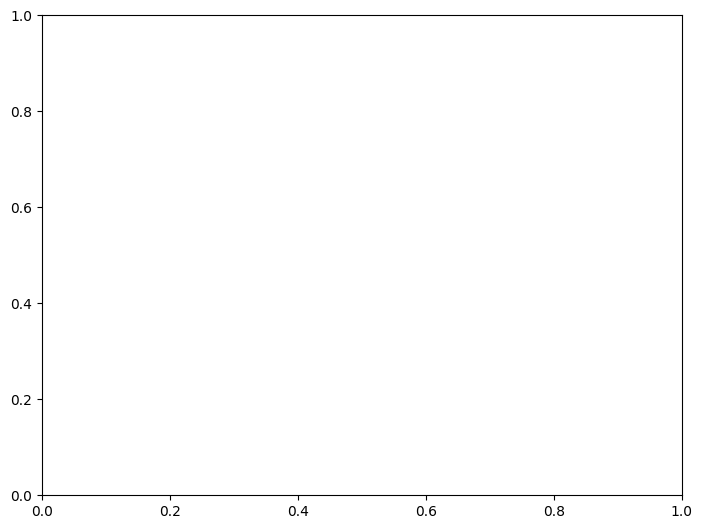

In [40]:
nx.draw(G)

In [41]:
pr = nx.pagerank(G, alpha=0.9)